In [1]:
import numpy as np
import yfinance as yf
from datetime import datetime

# Fetch stock data for NVIDIA
stock_symbol = "NVDA"
stock_data = yf.Ticker(stock_symbol)
S = stock_data.history(period="1d")['Close'][0]  # Current stock price

# Define parameters
K = 125  # Strike price
expiration_date = datetime(2024, 11, 30)  # Expiration date
today = datetime.today()
T = (expiration_date - today).days / 365  # Time in years
r = 0.05  # Risk-free interest rate
sigma = 0.5159657285837116  # Historical volatility
n = 100  # Number of time steps

# Calculate time step
dt = T / n

# Calculate up and down factors
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)

# Initialize asset prices at maturity
asset_prices = np.zeros(n + 1)
for j in range(n + 1):
    asset_prices[j] = S * (u ** (n - j)) * (d ** j)

# Initialize option values at maturity
option_values = np.zeros(n + 1)
for j in range(n + 1):
    option_values[j] = max(asset_prices[j] - K, 0)  # Call option payoff

# Backtrack to calculate option price
for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        option_values[j] = np.exp(-r * dt) * (p * option_values[j] + (1 - p) * option_values[j + 1])

# Final option price
option_price = option_values[0]

print(f"Current Stock Price (S): {S}")
print(f"Option Strike Price (K): {K}")
print(f"Time to Expiration (T): {T}")
print(f"Risk-Free Interest Rate (r): {r}")
print(f"Volatility (σ): {sigma}")
print(f"Binomial Option Price: {option_price:.2f}")


Current Stock Price (S): 132.64999389648438
Option Strike Price (K): 125
Time to Expiration (T): 0.136986301369863
Risk-Free Interest Rate (r): 0.05
Volatility (σ): 0.5159657285837116
Binomial Option Price: 14.62


C:\Users\HP\AppData\Local\Temp\ipykernel_17252\2274020833.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S = stock_data.history(period="1d")['Close'][0]  # Current stock price


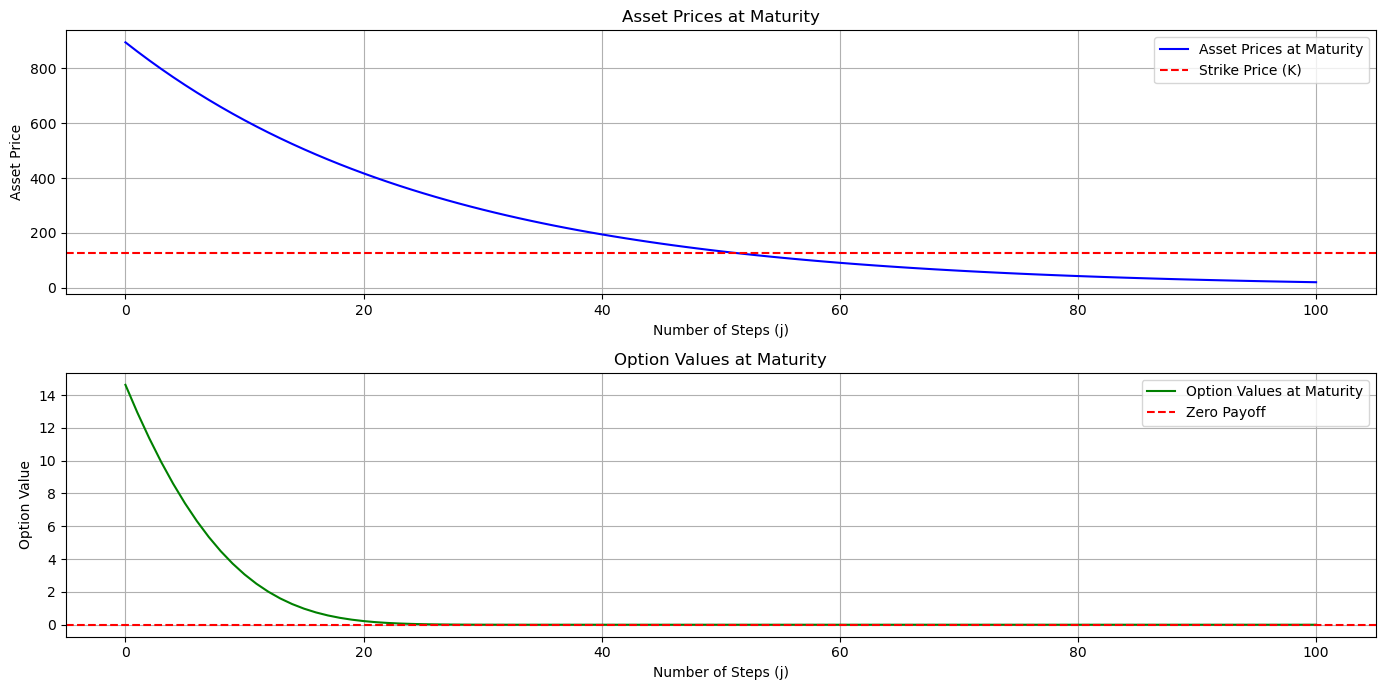

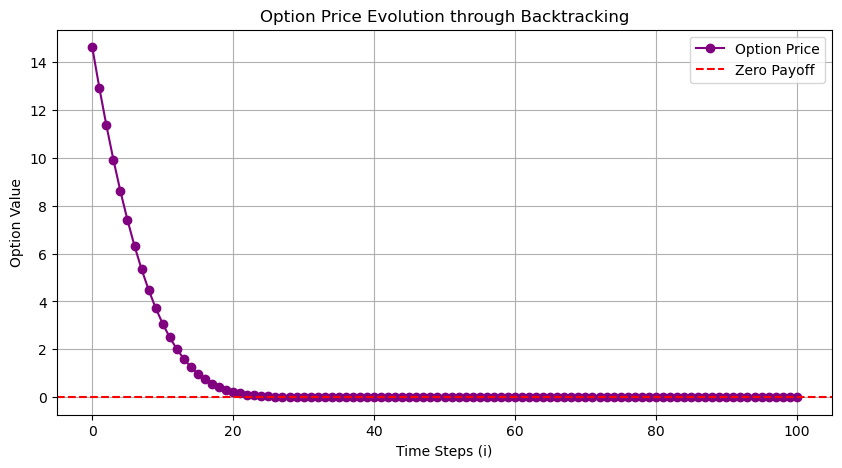

In [3]:
import matplotlib.pyplot as plt

# Plot asset prices at maturity
plt.figure(figsize=(14, 7))

# Plot the asset prices
plt.subplot(2, 1, 1)
plt.plot(asset_prices, label='Asset Prices at Maturity', color='blue')
plt.axhline(y=K, color='red', linestyle='--', label='Strike Price (K)')
plt.title('Asset Prices at Maturity')
plt.xlabel('Number of Steps (j)')
plt.ylabel('Asset Price')
plt.legend()
plt.grid()

# Plot option values at maturity
plt.subplot(2, 1, 2)
plt.plot(option_values, label='Option Values at Maturity', color='green')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Payoff')
plt.title('Option Values at Maturity')
plt.xlabel('Number of Steps (j)')
plt.ylabel('Option Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Visualize the option price evolution
plt.figure(figsize=(10, 5))
plt.plot(range(n + 1), option_values, label='Option Price', color='purple', marker='o')
plt.title('Option Price Evolution through Backtracking')
plt.xlabel('Time Steps (i)')
plt.ylabel('Option Value')
plt.grid()
plt.axhline(y=0, color='red', linestyle='--', label='Zero Payoff')
plt.legend()
plt.show()
